# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv', delimiter = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.

## 4.1 Data preparation

### Handling missing data

<Axes: >

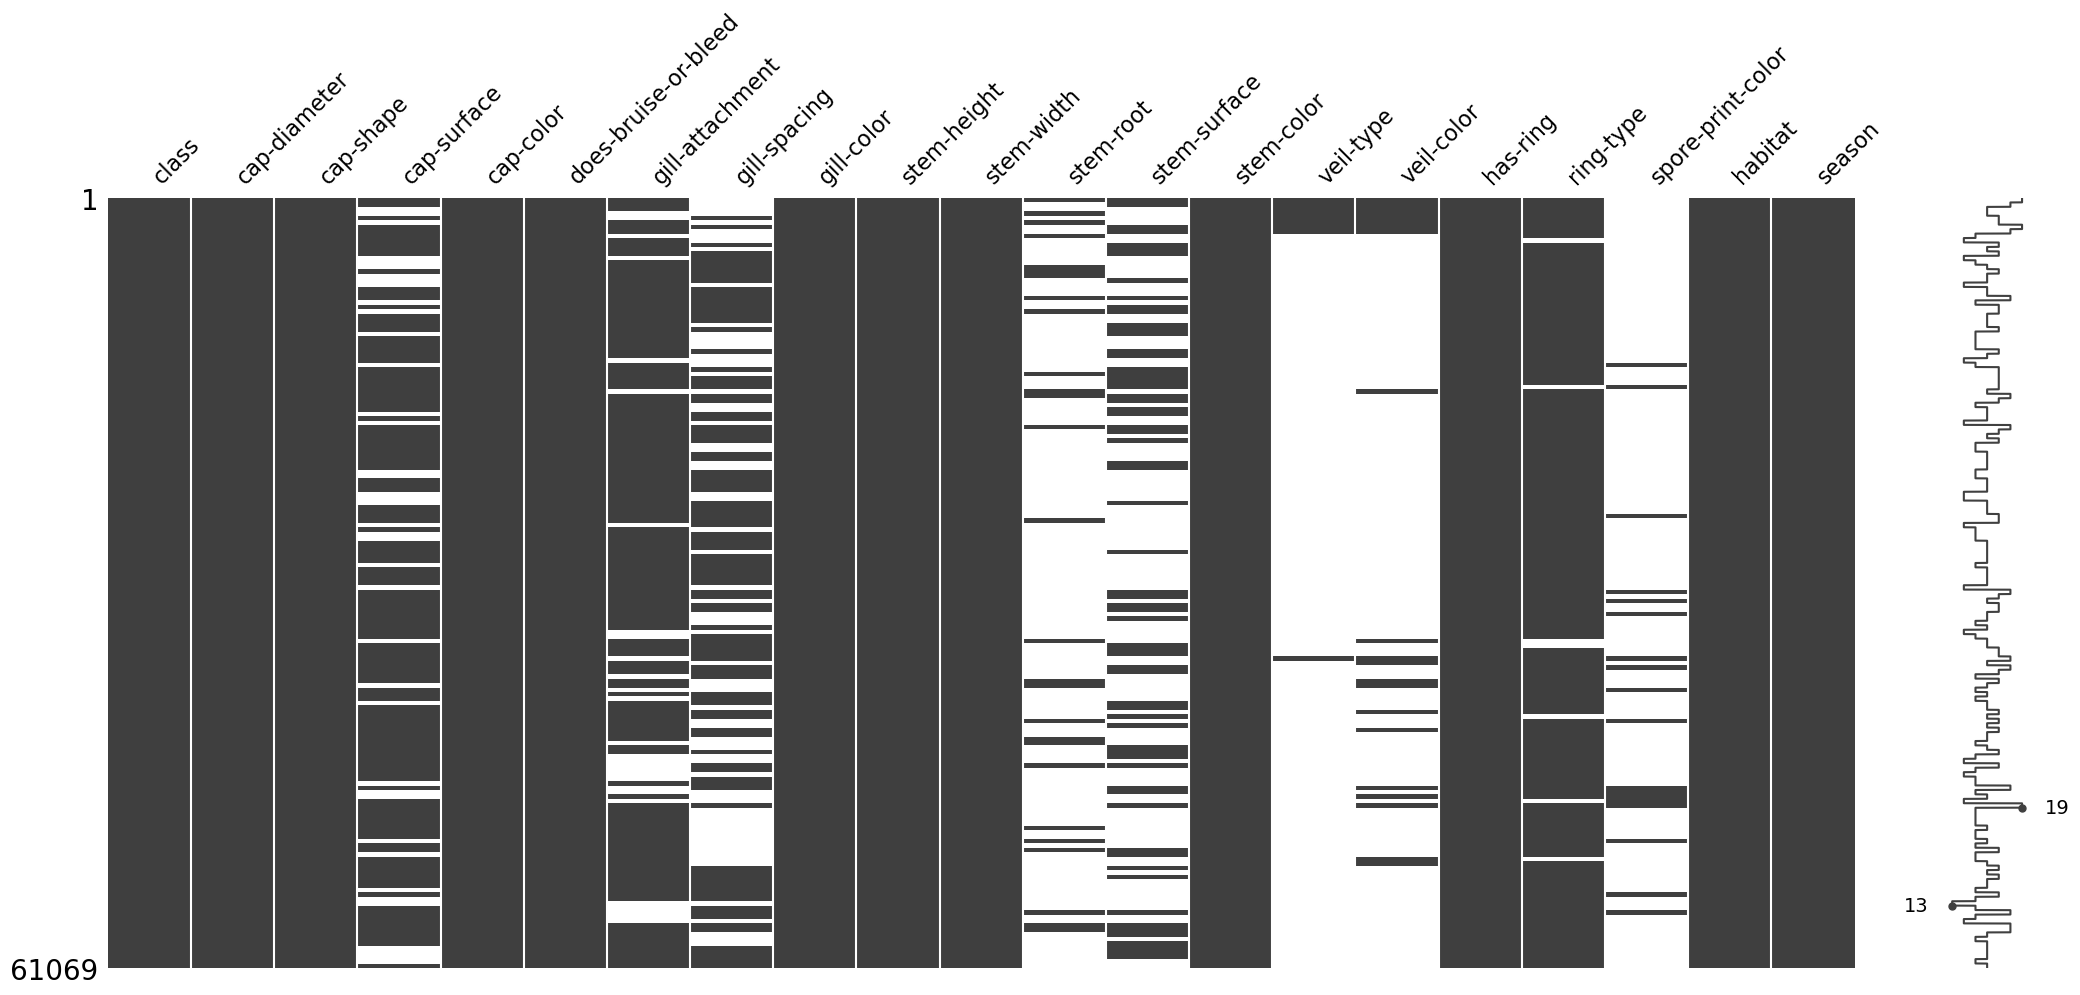

In [7]:
import missingno as msno 

msno.matrix(df) 


In [8]:
import numpy as np
import pandas as pd

In [9]:
missing_percentage = df.isnull().mean() * 100
missing_df = missing_percentage.to_frame(name='missing_percentage')
missing_df = missing_df[missing_df['missing_percentage'] > 0]
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

missing_df

,missing_percentage
veil-type,94.797688
spore-print-color,89.595376
veil-color,87.861272
stem-root,84.393064
stem-surface,62.427746
gill-spacing,41.040462
cap-surface,23.121387
gill-attachment,16.184971
ring-type,4.046243


IMPUTE: cap-surface, gill-attachment, gill-spacing, ring-type because is missing less than the 50% of data. 

DROP: stem-root, stem-surface, veil-type, veil-color, spore-print-color because is missing more than the 50% of data. 

In [11]:
#dropping
columns_to_drop = ["stem-root", "stem-surface", "veil-type", "veil-color", "spore-print-color"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

In [12]:
# imputing with mode for less porcentage
df_imputed = df.copy()
df_imputed['ring-type'] = df_imputed['ring-type'].fillna(df_imputed['ring-type'].mode()[0])

In [13]:
#encoding = handling string

#categorical columns
categorical_cols = df_imputed.select_dtypes(include='object').columns.tolist()

# Separate binary and multi-category columns
binary_cols = [col for col in categorical_cols if df_imputed[col].nunique() == 2]
multi_cols  = [col for col in categorical_cols if df_imputed[col].nunique() > 2]

# One-hot encode both, with drop_first=True only for binary
encoded_data = pd.get_dummies(df_imputed, columns=binary_cols, drop_first=True, dtype=float)
encoded_data = pd.get_dummies(encoded_data, columns=multi_cols, drop_first=False, dtype=float)

encoded_data.head()


,cap-diameter,stem-height,stem-width,class_p,does-bruise-or-bleed_t,has-ring_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-spacing_c,gill-spacing_d,gill-spacing_f,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# imputing with MICE for more porcentage 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = [col for col in encoded_data.columns 
                     if col.startswith('gill-spacing_') or 
                        col.startswith('gill-attachment_') or 
                        col.startswith('cap-surface_')]

imputer = IterativeImputer(max_iter=10, random_state=42)
X = encoded_data[columns_to_impute]
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=columns_to_impute)
X_imputed = X_imputed.round()
encoded_data.update(X_imputed)
encoded_data.head()


,cap-diameter,stem-height,stem-width,class_p,does-bruise-or-bleed_t,has-ring_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-spacing_c,gill-spacing_d,gill-spacing_f,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


rule: least 10–20 samples per feature. Here are 700 samples per feature, so the number of features is reasonable for a dataset with 60,000 rows.

<Axes: >

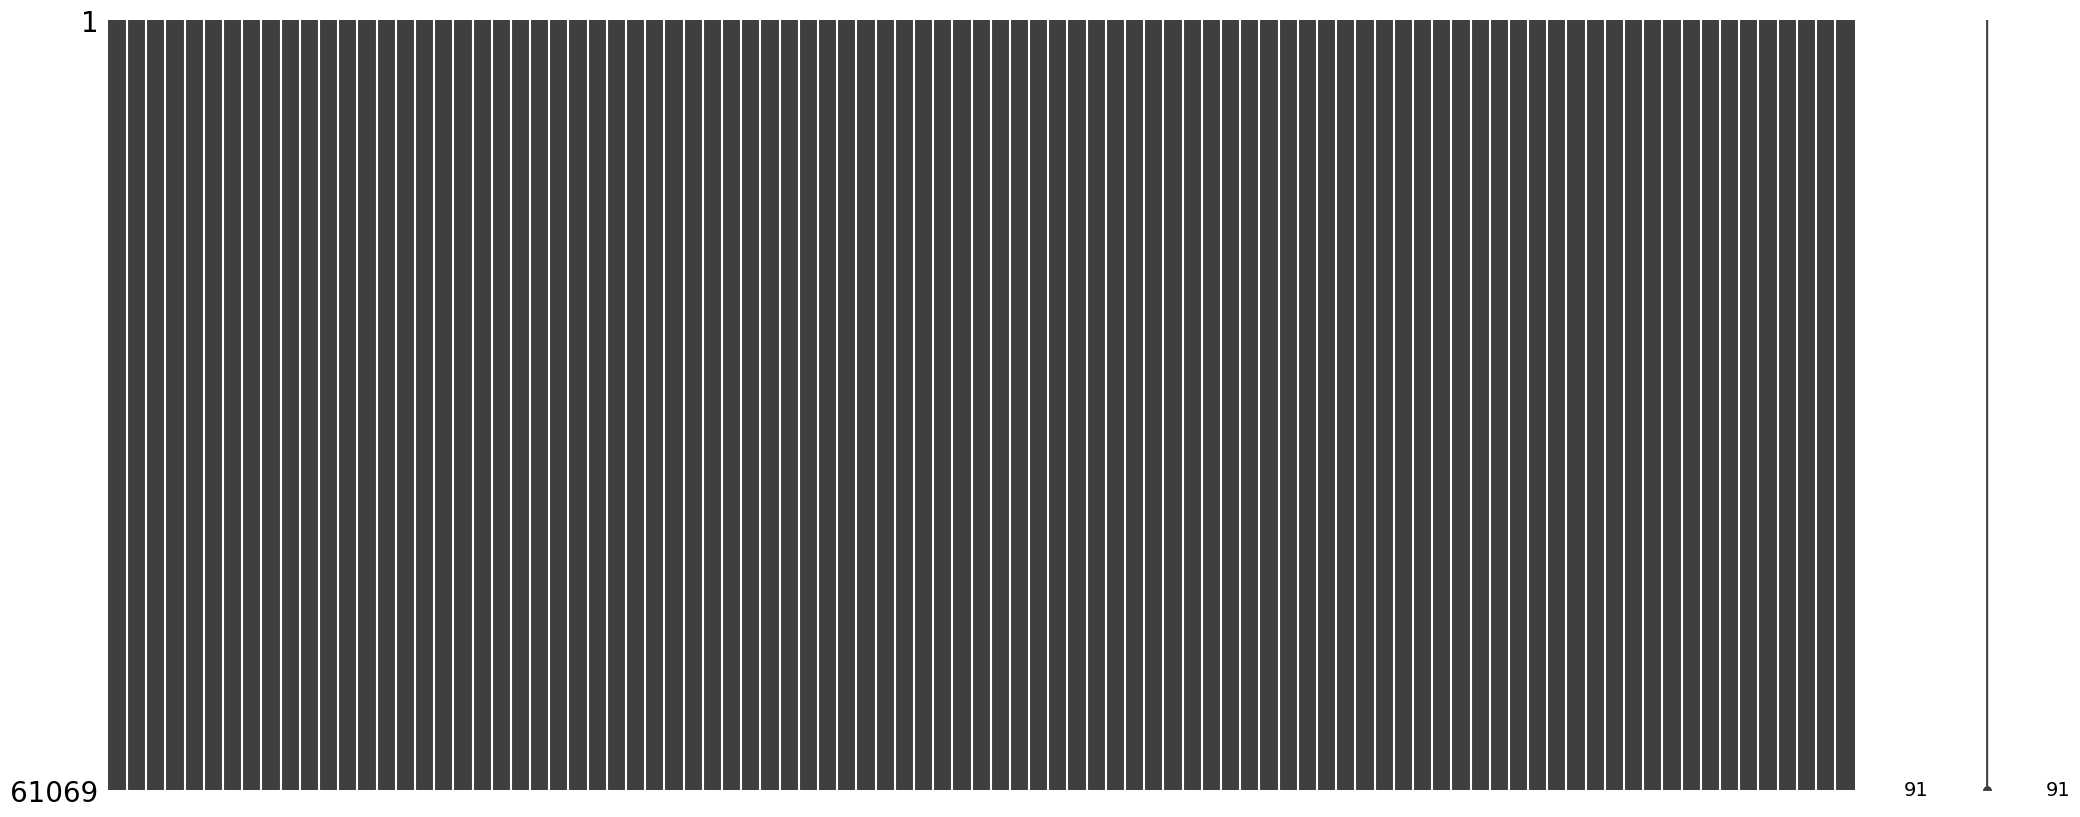

In [16]:
msno.matrix(encoded_data) 


### Handling outliers

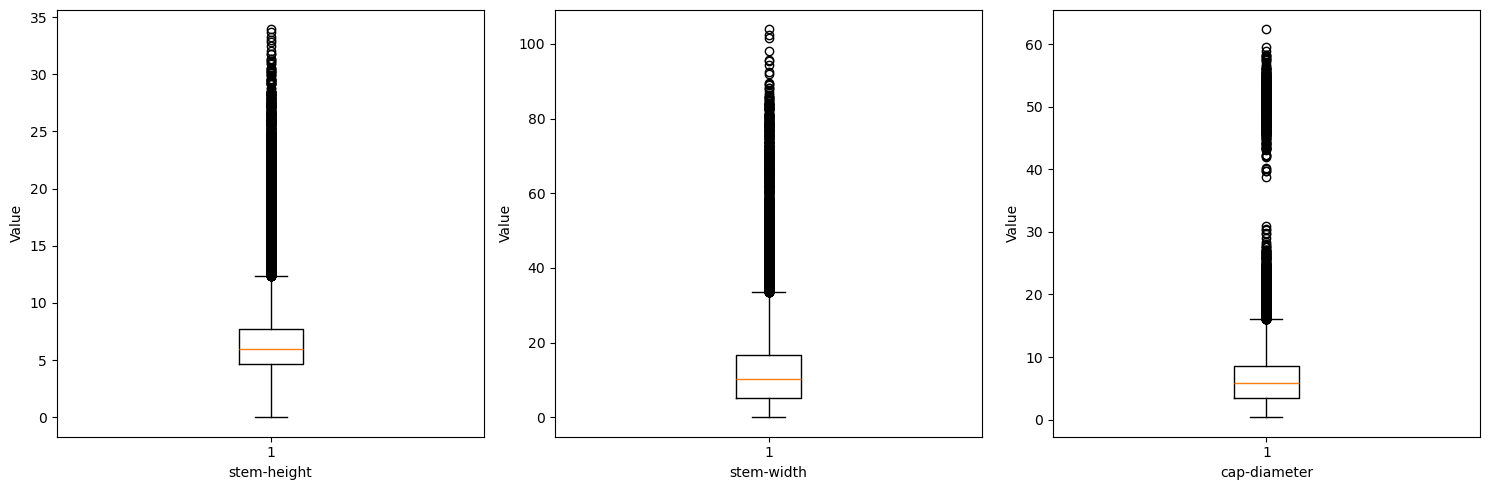

In [18]:
import matplotlib.pyplot as plt

num_features = ['stem-height', 'stem-width', 'cap-diameter']
fig, axes = plt.subplots(1, len(num_features), figsize=(15, 5), sharey=False)
for ax, col in zip(axes, num_features):
    ax.boxplot(encoded_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [19]:
def count_outliers(encoded_data, col):
    s = pd.to_numeric(encoded_data[col], errors="coerce")
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    mild = s[(s < q1 - 1.5*iqr) | (s > q3 + 1.5*iqr)]
    extreme = s[(s < q1 - 3*iqr) | (s > q3 + 3*iqr)]
    return pd.Series([len(mild)-len(extreme), len(extreme)], index=["Mild", "Extreme"])

cols = ["stem-height", "stem-width", "cap-diameter"]
outlier_table = pd.DataFrame({col: count_outliers(df, col) for col in cols}).T
outlier_table

,Mild,Extreme
stem-height,2058,1111
stem-width,1423,544
cap-diameter,1963,437


Keep mild outliers because it represent something real.

Transform extreme outliers because are unrealistic values can be errors.

In [21]:
transformed_data = encoded_data.copy()

for col in ["stem-height", "stem-width", "cap-diameter"]:
    s = pd.to_numeric(transformed_data[col], errors="coerce")
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr

    # Apply log only to extreme outliers
    transformed = s.copy()
    mask_extreme = (s < lower) | (s > upper)
    transformed[mask_extreme] = np.log(s[mask_extreme])

    # Replace original column with transformed version
    transformed_data[f"log({col})"] = transformed
    transformed_data = transformed_data.drop(columns=[col])

transformed_data[[f"log({col})" for col in ["stem-height", "stem-width", "cap-diameter"]]]


,log(stem-height),log(stem-width),log(cap-diameter)
0,16.950000,17.09,15.26
1,2.889816,18.19,16.60
2,2.879198,17.74,14.07
3,15.770000,15.98,14.17
4,16.530000,17.20,14.64
...,...,...,...
61064,3.930000,6.22,1.18
61065,3.180000,5.43,1.27
61066,3.860000,6.37,1.27
61067,3.560000,5.44,1.24


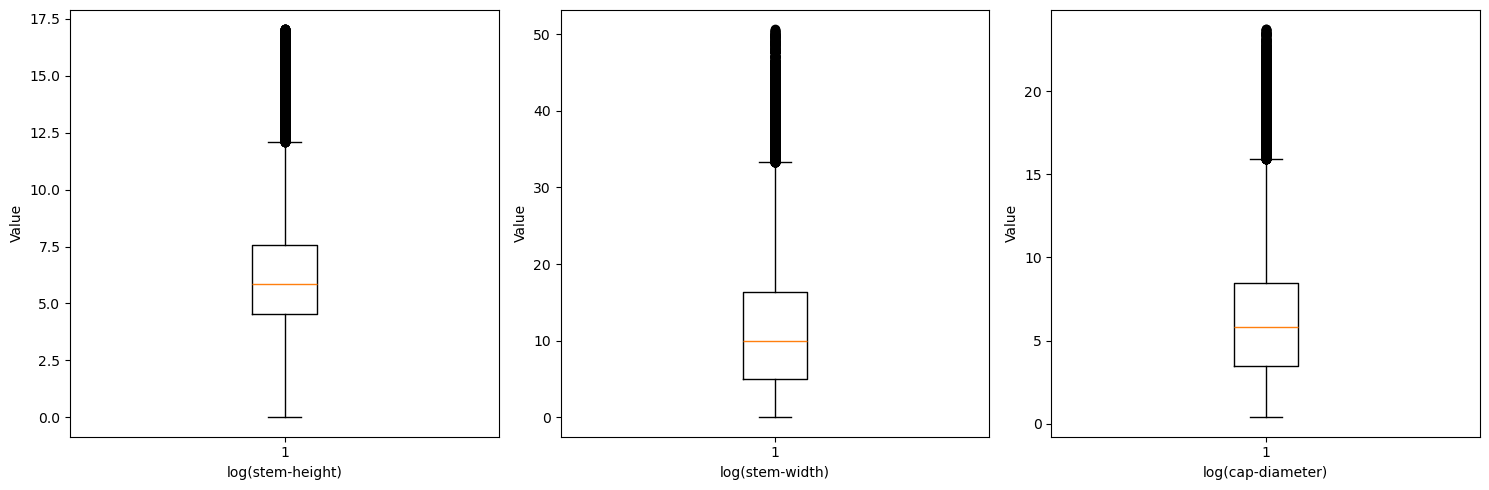

In [22]:
num_features = ["log(stem-height)", "log(stem-width)", "log(cap-diameter)"]
fig, axes = plt.subplots(1, len(num_features), figsize=(15, 5), sharey=False)
for ax, col in zip(axes, num_features):
    ax.boxplot(transformed_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaled_data = transformed_data.copy()
scaler = StandardScaler()
columns_to_scale = ["log(stem-height)", "log(stem-width)", "log(cap-diameter)"]
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])
scaled_data[columns_to_scale]

,log(stem-height),log(stem-width),log(cap-diameter)
0,3.904329,0.640234,2.198161
1,-1.229142,0.768392,2.531919
2,-1.233019,0.715964,1.901764
3,3.473502,0.510911,1.926672
4,3.750984,0.653050,2.043736
...,...,...,...
61064,-0.849364,-0.626203,-1.308787
61065,-1.123194,-0.718244,-1.286371
61066,-0.874921,-0.608727,-1.286371
61067,-0.984453,-0.717079,-1.293843


Standard Scaling (Z-score) because the numerical features, such as stem-height, stem-width, and cap-diameter, have different units and ranges. Min-Max scaling is highly sensitive to outliers, Z-score scaling maintains the relative positioning of mild outliers without compressing the scale. 

### Feature Engineering

#### Feature Selection

#### Feature Extraction

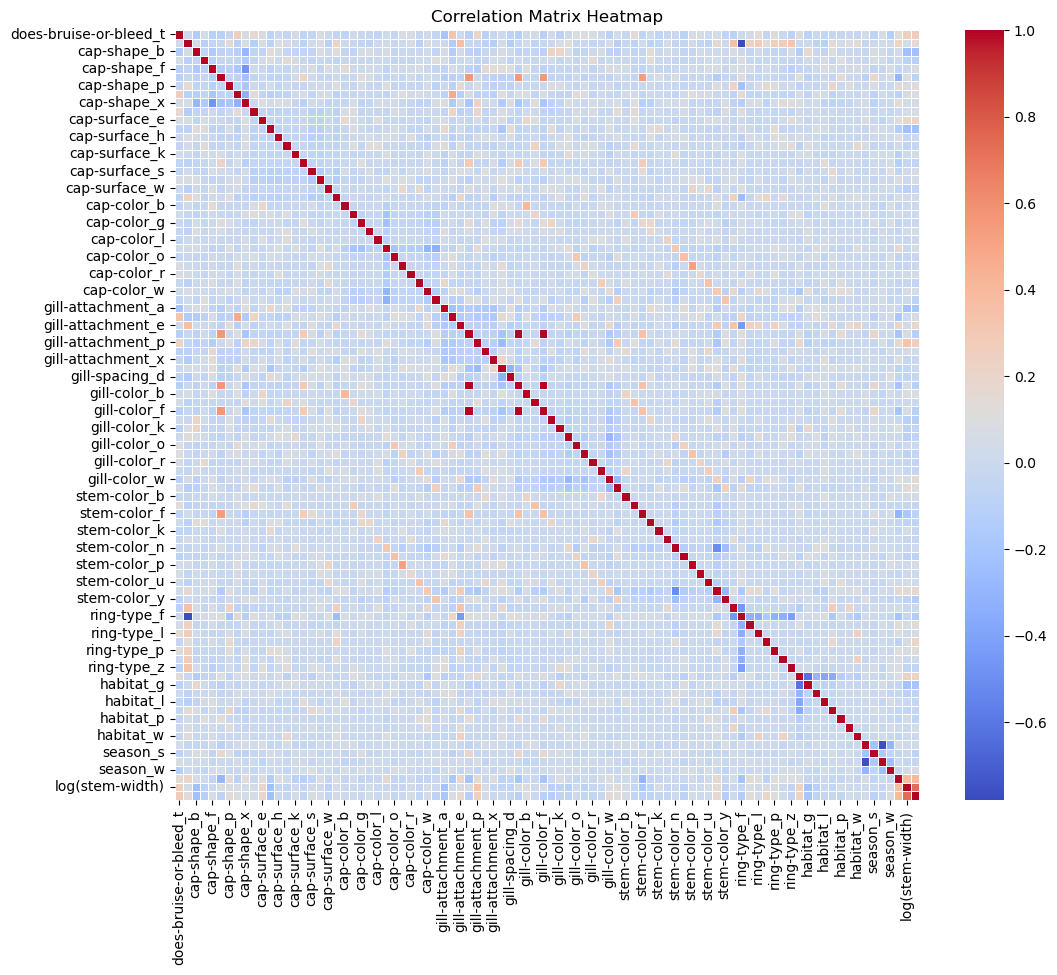

In [29]:
import seaborn as sns

#target
features_only = scaled_data.drop(columns=["class_p"])

corr_matrix = features_only.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [30]:
#table
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

#removing relation with the same feature
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

#filter
strong_corr = corr_pairs[abs(corr_pairs['Correlation']) > 0.5]
strong_corr = strong_corr.sort_values(by='Correlation', ascending=False)
strong_corr

,Feature 1,Feature 2,Correlation
3191,gill-attachment_f,gill-spacing_f,1.000000
8009,log(stem-width),log(cap-diameter),0.733099
485,cap-shape_o,gill-attachment_f,0.562095
506,cap-shape_o,stem-color_f,0.542055
2492,cap-color_p,stem-color_p,0.524449
5465,stem-color_n,stem-color_w,-0.502443
6826,habitat_d,habitat_g,-0.626131
7555,season_a,season_u,-0.765503
158,has-ring_t,ring-type_f,-0.780288


In [31]:
engineered_data = scaled_data.copy()

engineered_data['total_size'] = engineered_data['log(stem-width)'] + engineered_data['log(cap-diameter)']
engineered_data = engineered_data.drop(columns=['log(stem-width)', 'log(cap-diameter)'])
engineered_data['total_size'] = scaler.fit_transform(engineered_data[['total_size']])


In [32]:
(engineered_data['gill-attachment_f'] == engineered_data['gill-spacing_f']).value_counts()     #always the same value 


True    61069
Name: count, dtype: int64

In [33]:
engineered_data = engineered_data.drop(columns=['gill-spacing_f'])


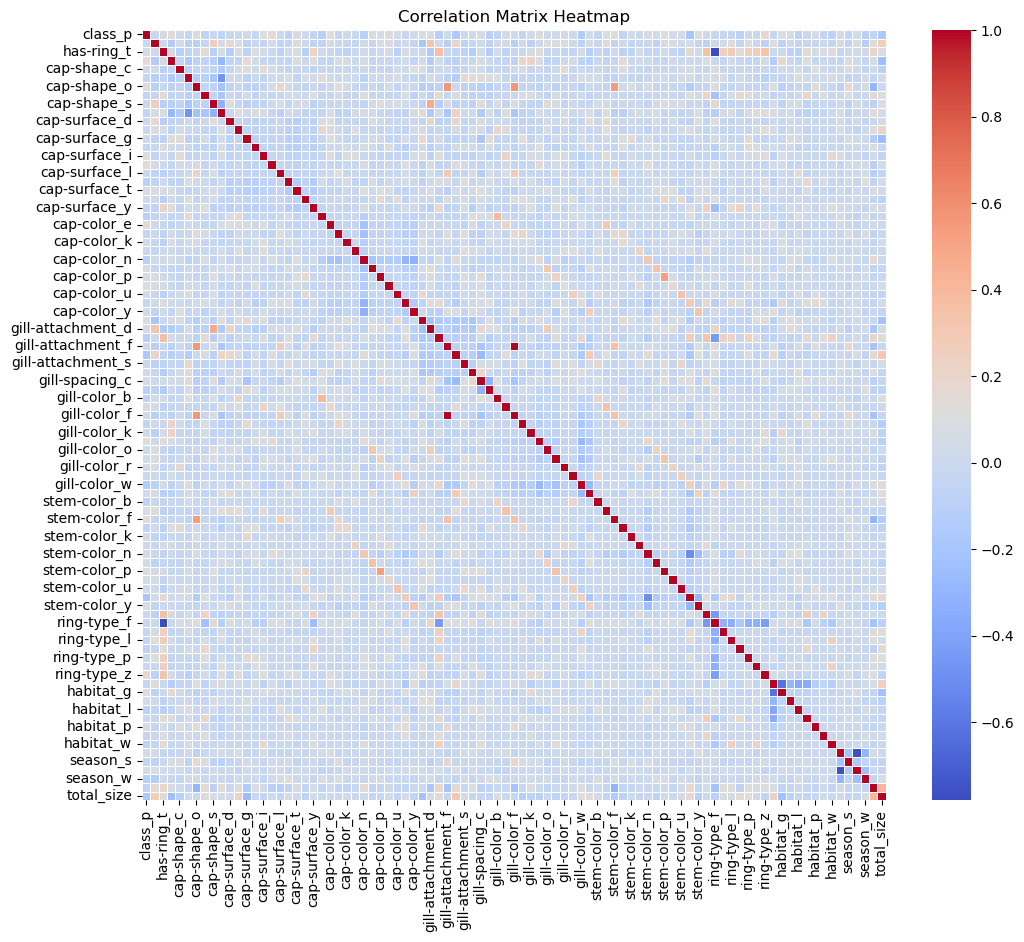

In [34]:
corr_matrix = engineered_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [35]:
#table
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

#removing
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

#filtering
strong_corr = corr_pairs[abs(corr_pairs['Correlation']) > 0.5]
strong_corr = strong_corr.sort_values(by='Correlation', ascending=False)
strong_corr

,Feature 1,Feature 2,Correlation
3248,gill-attachment_f,gill-color_f,1.000000
570,cap-shape_o,gill-attachment_f,0.562095
590,cap-shape_o,stem-color_f,0.542055
2554,cap-color_p,stem-color_p,0.524449
5405,stem-color_n,stem-color_w,-0.502443
6751,habitat_d,habitat_g,-0.626131
7472,season_a,season_u,-0.765503
246,has-ring_t,ring-type_f,-0.780288


In [36]:
engineered_data = engineered_data.drop(columns=['gill-color_f'])


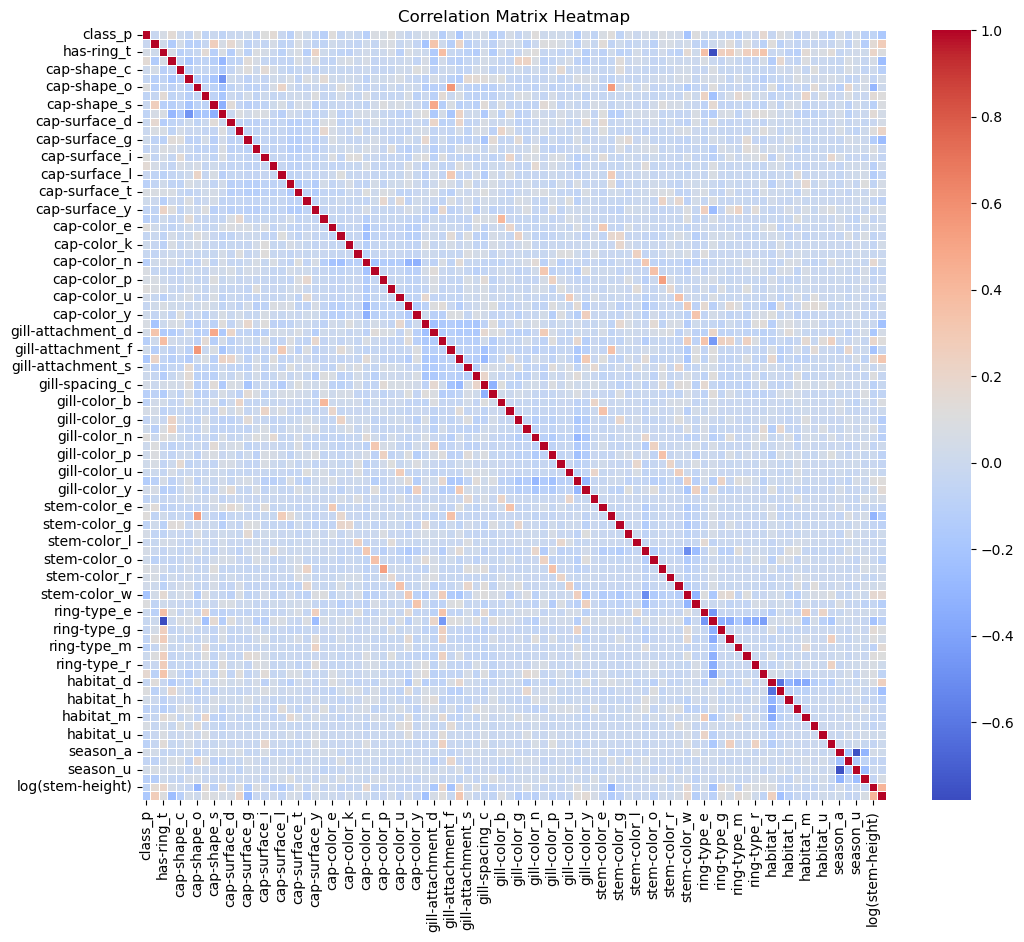

In [37]:
corr_matrix = engineered_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 4.2 Analysis 

### Checking if the target class is balanced 

In [40]:
df['class'].value_counts(normalize=True)


class
p    0.554913
e    0.445087
Name: proportion, dtype: float64

It will be better to use F1-score, precision, recall to evaluate the performance of the model. If your model predicts everything as poisonous, it would already be 55.5% accurate, without doing anything smart.

### Do poisonous mushrooms tend to be taller?

<Axes: xlabel='class_p', ylabel='log(stem-height)'>

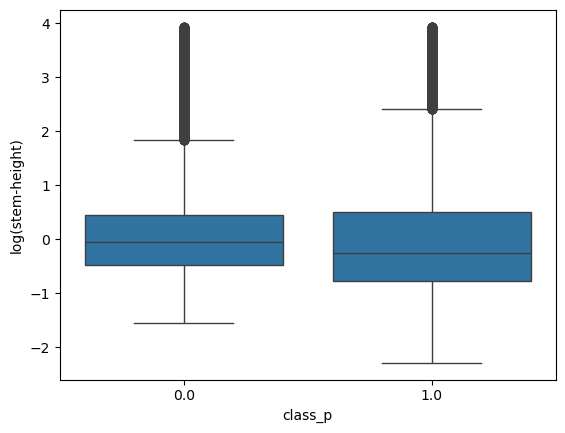

In [43]:
sns.boxplot(x='class_p', y='log(stem-height)', data=engineered_data)


There is no clear pattern suggesting that poisonous mushrooms are taller than edible ones, based on stem height in the log-transformed data.

## Are certain gill colors more common in poisonous mushrooms?

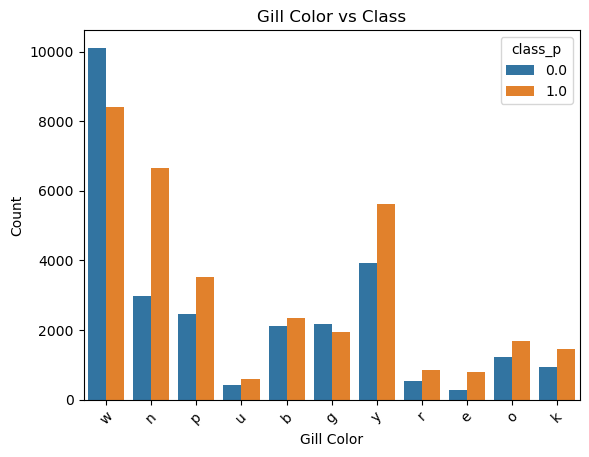

In [46]:
gill_cols = [col for col in engineered_data.columns if col.startswith('gill-color_')]

gill_color_temp = engineered_data[gill_cols].idxmax(axis=1).str.replace('gill-color_', '')

sns.countplot(x=gill_color_temp, hue=engineered_data['class_p'])
plt.title("Gill Color vs Class")
plt.xlabel("Gill Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Do poisonous mushrooms tend to have a larger overall size?

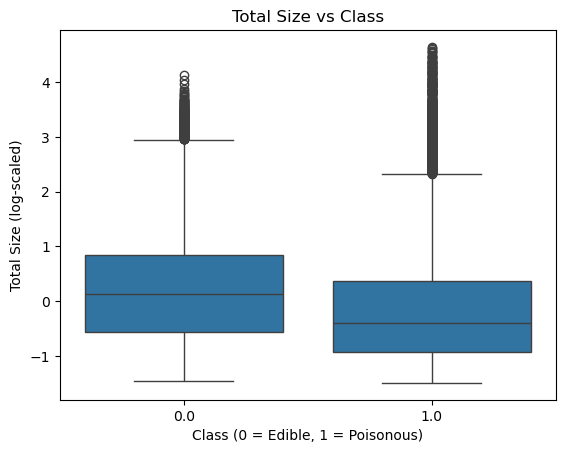

In [48]:
sns.boxplot(x='class_p', y='total_size', data=engineered_data)
plt.title("Total Size vs Class")
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Total Size (log-scaled)")
plt.show()


## Are certain cap colors more associated with poisonous mushrooms?

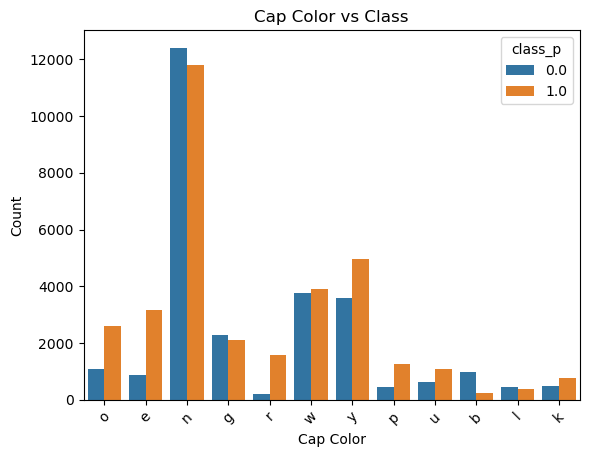

In [50]:
cap_cols = [col for col in engineered_data.columns if col.startswith('cap-color_')]
cap_color_temp = engineered_data[cap_cols].idxmax(axis=1).str.replace('cap-color_', '')

sns.countplot(x=cap_color_temp, hue=engineered_data['class_p'])
plt.title("Cap Color vs Class")
plt.xlabel("Cap Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Is gill attachment type associated with poisonous mushrooms?

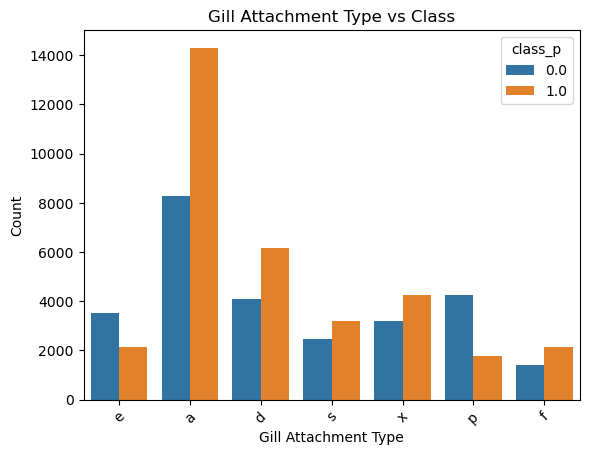

In [52]:
attachment_cols = [col for col in engineered_data.columns if col.startswith('gill-attachment_')]
attachment_temp = engineered_data[attachment_cols].idxmax(axis=1).str.replace('gill-attachment_', '')

sns.countplot(x=attachment_temp, hue=engineered_data['class_p'])
plt.title("Gill Attachment Type vs Class")
plt.xlabel("Gill Attachment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## 4.3 Classification models

### Logistic regression

In [55]:
X = engineered_data.drop(columns=['class_p'])
y = engineered_data['class_p']


In [56]:
from sklearn.model_selection import train_test_split

# 80% train y 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 80% train y 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:39084
Size of validation set:9771
Size of test set:12214


C,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000,1000.0000
train accuracy,0.618105,0.730273,0.767347,0.775867,0.774639,0.774665,0.774639,0.774690
validation accuracy,0.626139,0.735544,0.766349,0.774128,0.774128,0.774435,0.774742,0.774639
train recall,0.830275,0.807497,0.795186,0.793526,0.793388,0.793803,0.794034,0.794172
validation recall,0.828292,0.810955,0.794541,0.791774,0.793803,0.794725,0.794541,0.794356


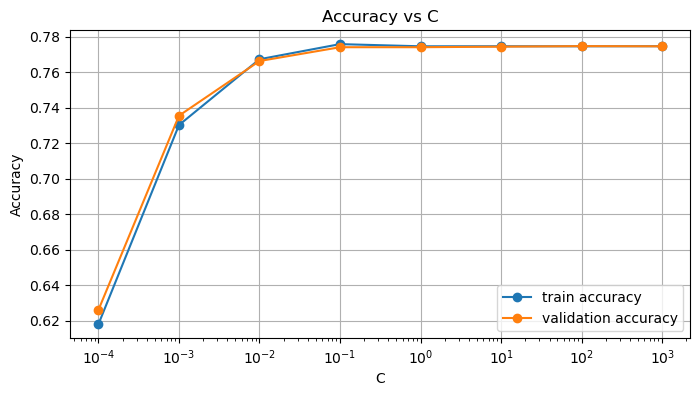

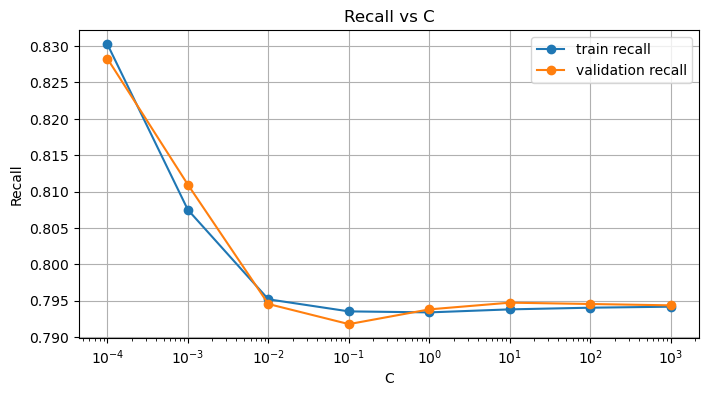

In [57]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# finding best C with ccuracy and recall
scores = {}
C_values = [10**k for k in range(-4, 4)]

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    scores[C] = {
        'train accuracy': accuracy_score(y_train, y_train_pred),
        'validation accuracy': accuracy_score(y_val, y_val_pred),
        'train recall': recall_score(y_train, y_train_pred),
        'validation recall': recall_score(y_val, y_val_pred)
    }

#dataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.index.name = 'C'

display(scores_df.T) 

#Plotting Accuracy
scores_df[['train accuracy', 'validation accuracy']].plot(
    marker='o', logx=True, figsize=(8, 4), title='Accuracy vs C')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

#Plotting Recall
scores_df[['train recall', 'validation recall']].plot(
    marker='o', logx=True, figsize=(8, 4), title='Recall vs C')
plt.xlabel("C")
plt.ylabel("Recall")
plt.grid(True)
plt.show()


In both graphs the training and validation lines stay close together the whole time. It means the model is learning consistently and not just memorizing the training data. In other words, it’s generalizing well to new unseen examples. No overftting.

In the accuracy graph, both training and validation accuracy go up as C increases, then stay flat around C = 0.1 and higher. This means the model improves at first, then stops changing much. C = 100 has the highest validation accuracy.

In the recall graph, recall is higher when C is very small, but drops and becomes stable as C gets larger. The highest recall happens at C = 0.0001, but the accuracy there is too low, so it's not a good choice.

### BEST C

Both C = 10 and C = 100 give similar, strong results.
C = 10 has slightly better recall, while C = 100 has slightly better accuracy.
Since recall is a bit more important here, C = 10 is the best overall choice.

In [63]:
from sklearn.linear_model import LogisticRegression

#training final model with best C
final_model = LogisticRegression(C=10, solver='liblinear', max_iter=1000)
final_model.fit(X_train, y_train)

#TRAIN evaluation
y_train_pred = final_model.predict(X_train)

print("TRAIN SET")
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\n")

print("Classification Report:\n", classification_report(y_train, y_train_pred))


TRAIN SET
Confusion Matrix:
 [[13061  4335]
 [ 4472 17216]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.75      0.75     17396
         1.0       0.80      0.79      0.80     21688

    accuracy                           0.77     39084
   macro avg       0.77      0.77      0.77     39084
weighted avg       0.77      0.77      0.77     39084



the structure of confusion matrix shown above is

    [[TN FP]

     [FN TP]]

The model is doing a good job on the training set. It gets 77% of the predictions right overall.

It’s better at identifying the positive class (1.0), it correctly catches 79 out of every 100 real positives (recall), and when it predicts a positive, it’s correct 80% of the time (precision). That means 20 out of 100 predicted positives are actually wrong (false positives).

It's a bit less accurate with the negative class (0.0), but still performs reasonably well.

In [66]:
# VALIDATION evaluation
y_val_pred = final_model.predict(X_val)
print("VALIDATION SET")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\n")
print("Classification Report:\n", classification_report(y_val, y_val_pred))



VALIDATION SET
Confusion Matrix:
 [[3258 1091]
 [1113 4309]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75      4349
         1.0       0.80      0.79      0.80      5422

    accuracy                           0.77      9771
   macro avg       0.77      0.77      0.77      9771
weighted avg       0.77      0.77      0.77      9771



The model continues to perform well on the positive class (1.0) with a recall of 79%, it catches 79 out of every 100 real positives, and with 80% precision, it’s right 4 out of every 5 times it predicts a positive.

Performance on the negative class is also slightly lower.

In [68]:
#TEST evaluation
y_test_pred = final_model.predict(X_test)
print("TEST SET")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_test_pred))



TEST SET
Confusion Matrix:
 [[4044 1392]
 [1362 5416]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.75      5436
         1.0       0.80      0.80      0.80      6778

    accuracy                           0.77     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.77      0.77      0.77     12214



For the positive class, the model still has a strong performance:

Recall is 80%, meaning it catches 80 out of every 100 actual positives.

Precision is also 80%, so 4 out of 5 predicted positives are correct.

For the negative class, performance is slightly lower:

74% recall and 75% precision, which is still okay.

The model shows balanced, reliable results across training, validation, and test sets.
There's no drop in performance, no signs of overfitting, and it handles both classes well, especially the positive class, which is more important. 

Mild underfitting, likely because logistic regression is too simple for this problem.
Since this is logistic regression a linear model.

#### Best performance metric

Recall is the most important metric in this case because it shows how well the model can catch poisonous mushrooms.

This is really important because we want to avoid false negatives, cases where the model says a mushroom is safe, but it's actually poisonous. That kind of mistake could be very dangerous or even deadly if someone eats it.

### Gradient Boosting

Because accuracy is important. This classifier is more precise and targeted

In [75]:
X = engineered_data.drop(columns=['class_p'])
y = engineered_data['class_p']

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#parameters for Gradient Boosting
parameters = {
    'max_depth': [3], 'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]
}

#GridSearchCV with Gradient Boosting
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=5, return_train_score=True)

#splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

#fitting the model
grid_search.fit(X_train, y_train)


print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best hyperparameters:", grid_search.best_params_)

Test score: 0.98
Best cross-validation score: 0.9833
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


The model tests 5 different parameter combinations.
With 5-fold cross-validation, it trains a total of 20 models (4 × 5) to find the best one based on average validation accuracy.

In [78]:
#best model on the test set
y_pred = grid_search.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5368   68]
 [ 130 6648]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      5436
         1.0       0.99      0.98      0.99      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214



The model makes very few mistakes, with just 68 edible mushrooms misclassified as poisonous, and 130 poisonous ones misclassified as edible, which is quite low considering the size of the dataset.

The model generalizes extremely well, with a test accuracy (98%) very close to cross-validation score (98.33%).

There’s no sign of overfitting, it performs consistently across validation and test data. 

Precision and recall are balanced for both classes, which is good for like identifying poisonous mushrooms.

##  Why does Gradient Boosting performs better than Logistic Regression?

Gradient Boosting does better because it can figure out complex patterns where different features work together to make a prediction. Logistic Regression is simpler, it looks at each feature on its own and draws one straight-line boundary, which doesn’t always work when the real patterns are more complicated. 
